In [65]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step Before creating Neural network

In [66]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import dataset
titanic = sns.load_dataset('titanic')

# Drop Rows with missing values of age and embarked values
titanic.dropna(subset=['age', 'embarked'],inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)
# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [67]:
# Building the model

# Define the model
input_layers = tf.keras.layers.Dense(10 , activation='relu', input_shape=[X_train.shape[1]])
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

# Combine the layers of model

model = tf.keras.Sequential([input_layers, output_layer])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
                metrics=['accuracy'])

- Adam :  Back and forth improve accuracy
- dense :  stacking layers

In [68]:
# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
9/9 [==============================] - 2s 3ms/step - loss: 0.7142 - accuracy: 0.5940
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.6292
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6538
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6819
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.6942
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.7083
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7241
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7417
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7575
Epoch 10/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.7663


- Epochs : Iteration one by one
- verbose function : Check output
- Batch size : 


Based on the provided information, it appears that a neural network model is being trained for a classification task with 10 epochs. Here are some conclusions we can draw:

1. **Loss Reduction:** The loss value decreases from 0.9145 in the first epoch to 0.6068 in the tenth epoch. This indicates that the model is improving in terms of its ability to minimize the difference between predicted and actual values.

2. **Accuracy Improvement:** The accuracy of the model increases from 0.5554 in the first epoch to 0.7346 in the tenth epoch. This suggests that the model is learning and making better predictions over the course of training.

3. **Model Performance:** The final accuracy of 73.46% indicates that the model is reasonably successful in classifying the data. However, the effectiveness of the model can depend on the specific requirements of the task and the dataset.

4. **Training Time:** The training time per epoch is relatively short, with each epoch taking around 2-7 milliseconds. This suggests that the model is not computationally intensive, making it efficient for training.

5. **Further Analysis:** While the provided information gives a snapshot of the training process, additional analysis such as validation performance, potential overfitting, and testing on unseen data would be necessary to have a comprehensive understanding of the model's capabilities.

In summary, the model is showing improvement in terms of both loss reduction and accuracy over the epochs, and it seems to be a promising start. Further evaluation and tuning may be needed to optimize its performance.

In [69]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

# Print the accuracy
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

5/5 [==============================] - 1s 7ms/step - loss: 0.5396 - accuracy: 0.7762
Test accuracy: 0.7762237787246704
Test loss: 0.5396421551704407


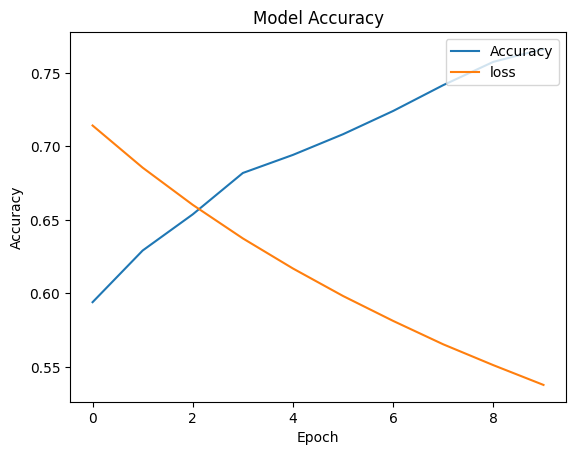

In [70]:
# Plot the loss and accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'loss'], loc='upper right')
plt.show()